**Name : Adeniyi Adeleke**

**MEGR 8090_Introduction to Machine Learning**

# Importing Libraries

In [67]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [68]:
#Data directory depends on where the file is sored
df = pd.read_excel(r'C:/Users/kyade/Downloads/ccpp.xlsx')

In [69]:
#Getting dataset from shared google drive and using Google colab
#from google.colab import drive

#drive.mount('/content/gdrive/', force_remount = True)
#df = pd.read_excel(r'/content/gdrive/MyDrive/Adeniyi Adeleke/ccpp.xlsx')

**Exploratory Data Analysis**

In [5]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Checking for Null Values

In [8]:
missing_val = df.isnull().sum()
missing_val

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

**Statistical Insight of the Data**

In [7]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Correlation Map: This helps us to understand how correlated the features are to each other

<AxesSubplot:>

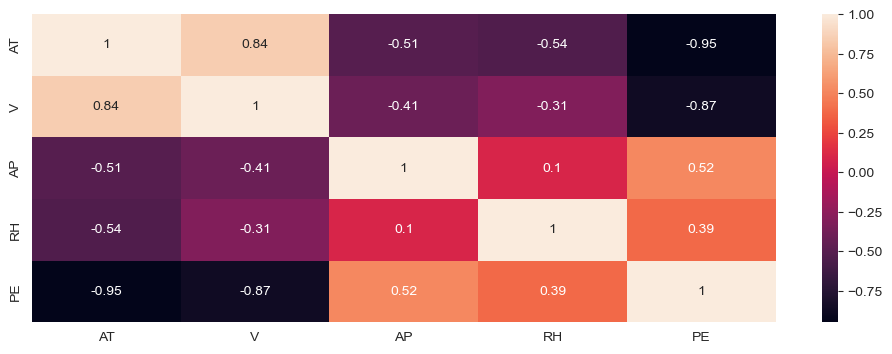

In [9]:
plt.figure(figsize=(12,4))
correlations = df.corr()
sns.heatmap(correlations, annot =True)

From the correlation coefficient, we can see that the ambient temperature has a high negative correlation coefficient of -0.95. This means that ambient temperature has the strongest relationship to the net hourly energy output. The feature with the weakest relationship to the net hourly energy ouptput is Relative Humidity. Atmospheric pressure and relative Humidity are poorly correlated.

# Pairwise plots

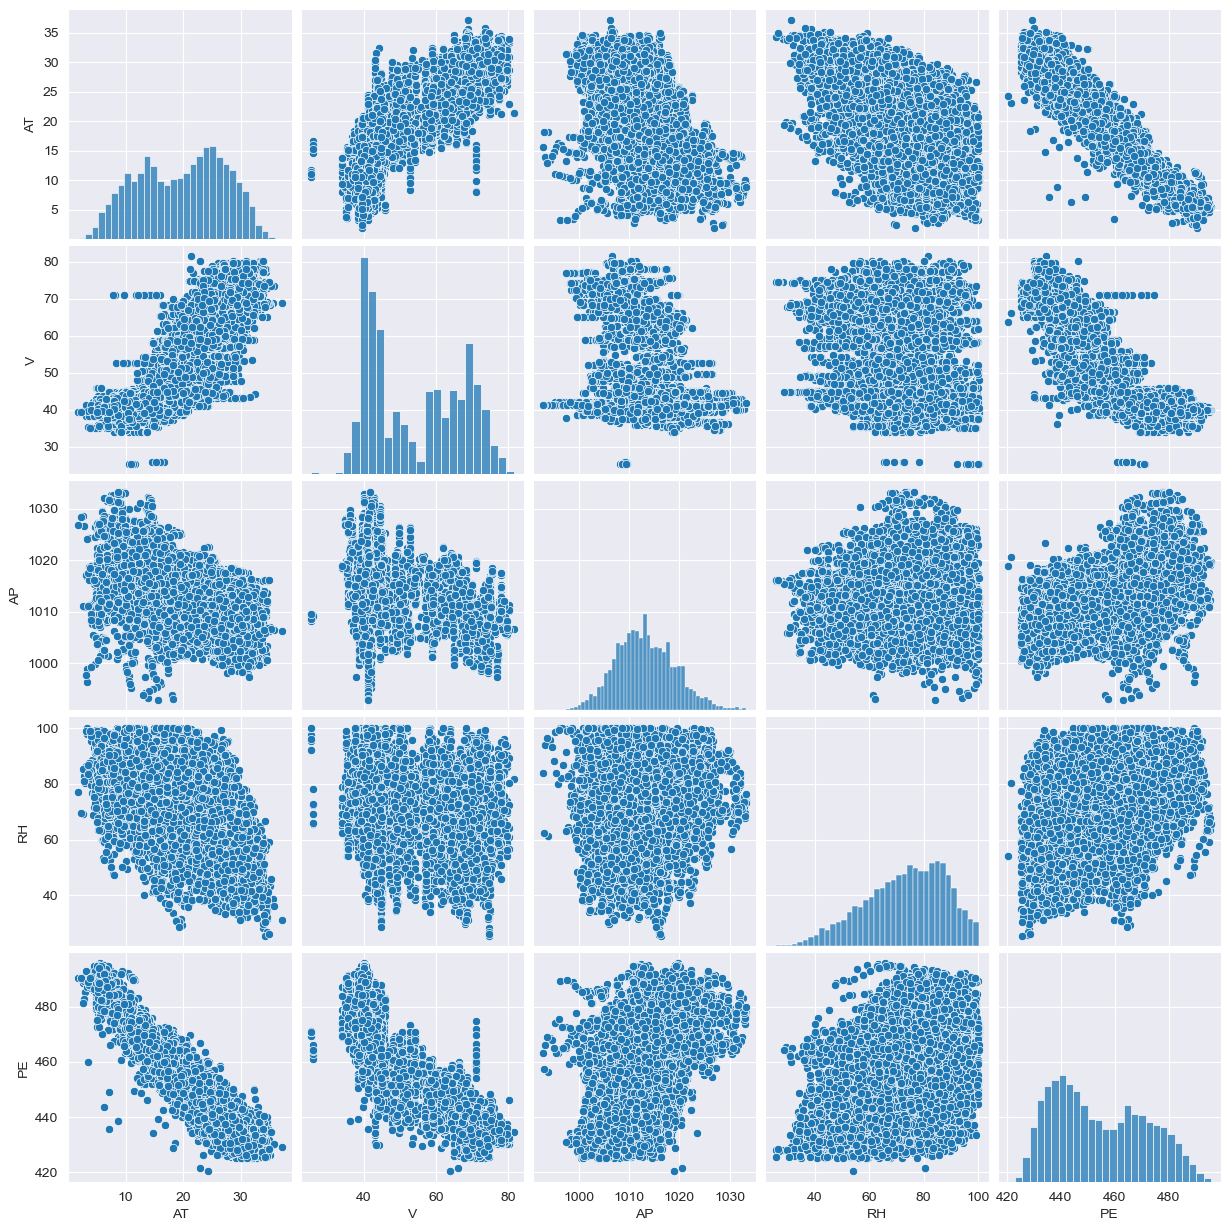

In [64]:
sns.pairplot(df)

From the pairplot, the ambient temperature and net hourly energy output PE are strongly correlated. Also, the exhaust volume V have a strong linear relationship with PE, this means the value of V is important in the determination of the net hourly energy output. On the other hand, the relative humidity RH and PE are positively correlated, however it is a weak correlation. Also the ambient pressure and the exhaust volume are not strongly correlated.

# Building the Regression Models

In [58]:
#Importing the test_train_split module
from sklearn.model_selection import train_test_split

#Defining the features and target variable
X = df[['AT', 'V', 'AP','RH']]
Y = df[['PE']]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

# Models and Evaluation using RMSE and MAE

**Model 1**

In [59]:
#Importing library
from sklearn.linear_model import LinearRegression

x_train1 = x_train[['AT']]
x_test1 = x_test[['AT']]
y_train = y_train[['PE']]
y_test = y_test[['PE']]
#Initializing a linear regression model object and fitting the linear regression model
model1 = LinearRegression().fit(x_train1, y_train)
#model.fit(x_train1, y_train)

#Predicting and storing result for test data
train_pred = model1.predict(x_train1)
test_pred = model1.predict(x_test1)

print('Model 1\nIntercept: ', model1.intercept_)
print('Coefficients: ', model1.coef_)

#For Model Evaluation
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ' + str(mae))
print('Root Mean Squared Error: ' + str(rmse))

from sklearn.metrics import r2_score
#Coefficient of Determination
r2= r2_score(y_test, test_pred)
print("Rsquared: ",r2)

Model 1
Intercept:  [497.03089567]
Coefficients:  [[-2.17260248]]
Mean Absolute Error: 4.1744381564942
Root Mean Squared Error: 5.272562059337881
Rsquared:  0.9049536175690114


Text(0.5, 1.0, 'Linear Regression Model')

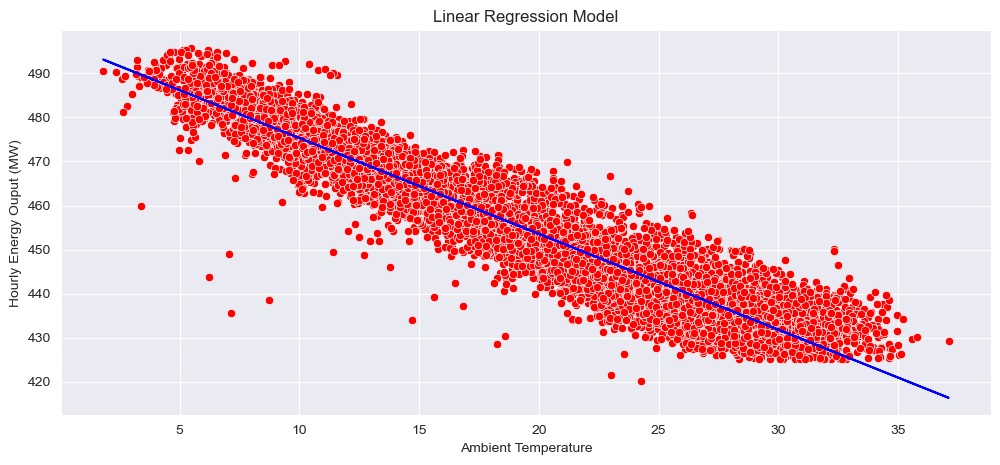

In [60]:
#regression plot between ambient temperature AT and hourly energy output PE
plt.figure(figsize=(12,5))
sns.scatterplot(x='AT',y='PE', data=df, color ='red')
plt.plot(x_train1, model1.coef_*x_train1 + model1.intercept_, '-b')
plt.xlabel('Ambient Temperature')
plt.ylabel('Hourly Energy Ouput (MW)')
plt.title('Linear Regression Model')

**Model 2**

In [65]:
#Fitting the linear regression model
x_train2 = x_train[['AT','V']]
x_test2 = x_test[['AT','V']]
y_train = y_train[['PE']]
y_test = y_test[['PE']]

#Initializing a linear regression model object and fitting the linear regression model
model2 = LinearRegression().fit(x_train2, y_train)

#Predicting and storing result for test data
train_pred = model2.predict(x_train2)
test_pred = model2.predict(x_test2)

print('Model 2\nIntercept: ', model2.intercept_)
print('Coefficients: ', model2.coef_)

#For Model Evaluation
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ' + str(mae))
print('Root Mean Squared Error: ' + str(rmse))

from sklearn.metrics import r2_score
#Coefficient of Determination
r2= r2_score(y_test, test_pred)
print("Rsquared: ",r2)

Model 2
Intercept:  [505.57040805]
Coefficients:  [[-1.69841039 -0.32826254]]
Mean Absolute Error: 3.854553363596844
Root Mean Squared Error: 4.848681080539322
Rsquared:  0.9196215863801613


**Model 3**

In [62]:
x_train3 = x_train[['AT','V','RH']]
x_test3 = x_test[['AT','V','RH']]
y_train = y_train[['PE']]
y_test = y_test[['PE']]

#Initializing a linear regression model object and fitting the linear regression model
model3 = LinearRegression().fit(x_train3, y_train)

#Predicting and storing result for test data
train_pred = model3.predict(x_train3)
test_pred = model3.predict(x_test3)

print('Model 3\nIntercept: ', model3.intercept_)
print('Coefficients: ', model3.coef_)

#For Model Evaluation
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ' + str(mae))
print('Root Mean Squared Error: ' + str(rmse))

from sklearn.metrics import r2_score
#Coefficient of Determination
r2= r2_score(y_test, test_pred)
print("Rsquared: ",r2)

Model 3
Intercept:  [518.62656975]
Coefficients:  [[-2.01556593 -0.23061572 -0.1655292 ]]
Mean Absolute Error: 3.5704029333898633
Root Mean Squared Error: 4.4502443591618865
Rsquared:  0.9322888939219065


**Model 4**

In [63]:
x_train4 = x_train[['AT','V','AP','RH']]
x_test4 = x_test[['AT','V','AP','RH']]
y_train = y_train[['PE']]
y_test = y_test[['PE']]

#Initializing a linear regression model object and fitting the linear regression model
model4 = LinearRegression().fit(x_train4, y_train)

#Predicting and storing result for test data
train_pred = model4.predict(x_train4)
test_pred = model4.predict(x_test4)

print('Model 4\nIntercept: ', model4.intercept_)
print('Coefficients: ', model4.coef_)

#Model Performance Evaluation
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ' + str(mae))
print('Root Mean Squared Error: ' + str(rmse))

from sklearn.metrics import r2_score
#Coefficient of Determination
r2= r2_score(y_test, test_pred)
print("Rsquared: ",r2)

Model 4
Intercept:  [452.84103716]
Coefficients:  [[-1.97313099 -0.23649993  0.06387891 -0.15807019]]
Mean Absolute Error: 3.5665646552038224
Root Mean Squared Error: 4.442262858442491
Rsquared:  0.9325315554761302


***Model 4 is the optimal model from the set because the rsme is the smallest as compared to the other models. Also the coefficient of determination was 0.9325. This means that 93% of the variation in the data is explained or predicted by the linear model***

# Normalization

In [27]:
#Normalization using MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [48]:
#Importing the test_train_split module
from sklearn.model_selection import train_test_split

#Defining the features and target variable
X = normalized_df[['AT', 'V', 'AP','RH']]
Y = normalized_df[['PE']]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
#Importing library
from sklearn.linear_model import LinearRegression

x_train1 = x_train[['AT']]
x_test1 = x_test[['AT']]
y_train = y_train[['PE']]
y_test = y_test[['PE']]
#Initializing a linear regression model object and fitting the linear regression model
model1 = LinearRegression().fit(x_train1, y_train)
#model.fit(x_train1, y_train)

#Predicting and storing result for test data
train_pred = model1.predict(x_train1)
test_pred = model1.predict(x_test1)

print('Model1 summary\nIntercept: ', model1.intercept_)
print('Coefficients: ', model1.coef_)

#For Model Evaluation
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ' + str(mae))
print('Root Mean Squared Error: ' + str(rmse))

from sklearn.metrics import r2_score
#Coefficient of Determination
r2= r2_score(y_test, test_pred)
print("Rsquared: ",r2)

Model1 summary
Intercept:  [0.96474815]
Coefficients:  [[-1.01579957]]
Mean Absolute Error: 0.055290571609194684
Root Mean Squared Error: 0.06983525906407788
Rsquared:  0.9049536175690114


**Model 2 (Normalized Data)**

In [47]:
#Initializing a linear regression model object and fitting the linear regression model
#Fitting the linear regression model
x_train2 = x_train[['AT','V']]
x_test2 = x_test[['AT','V']]
y_train = y_train[['PE']]
y_test = y_test[['PE']]
model2 = LinearRegression().fit(x_train2, y_train)

#Predicting and storing result for test data
train_pred = model2.predict(x_train2)
test_pred = model2.predict(x_test2)

print('Model2 summary\nIntercept: ', model2.intercept_)
print('Coefficients: ', model2.coef_)

#For Model Evaluation
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ' + str(mae))
print('Root Mean Squared Error: ' + str(rmse))

from sklearn.metrics import r2_score
#Coefficient of Determination
r2= r2_score(y_test, test_pred)
print("Rsquared: ",r2)

Model2 summary
Intercept:  [0.97896089]
Coefficients:  [[-0.79409122 -0.24434907]]
Mean Absolute Error: 0.05105368693505754
Root Mean Squared Error: 0.06422094146409697
Rsquared:  0.9196215863801613


**Model 3 (Normalized Data)**

In [46]:
x_train3 = x_train[['AT','V','RH']]
x_test3 = x_test[['AT','V','RH']]
y_train = y_train[['PE']]
y_test = y_test[['PE']]

#Initializing a linear regression model object and fitting the linear regression model
model3 = LinearRegression().fit(x_train3, y_train)

#Predicting and storing result for test data
train_pred = model3.predict(x_train3)
test_pred = model3.predict(x_test3)

print('Model3 summary\nIntercept: ', model3.intercept_)
print('Coefficients: ', model3.coef_)

#For Model Evaluation
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ' + str(mae))
print('Root Mean Squared Error: ' + str(rmse))

from sklearn.metrics import r2_score
#Coefficient of Determination
r2= r2_score(y_test, test_pred)
print("Rsquared: ",r2)

Model3 summary
Intercept:  [1.12104708]
Coefficients:  [[-0.94237718 -0.17166363 -0.16355601]]
Mean Absolute Error: 0.04729010507801143
Root Mean Squared Error: 0.05894363389618393
Rsquared:  0.9322888939219065


**Model 4 (Normalized Data)**

In [66]:
x_train4 = x_train[['AT','V','AP','RH']]
x_test4 = x_test[['AT','V','AP','RH']]
y_train = y_train[['PE']]
y_test = y_test[['PE']]

#Initializing a linear regression model object and fitting the linear regression model
model4 = LinearRegression().fit(x_train4, y_train)

#Predicting and storing result for test data
train_pred = model4.predict(x_train4)
test_pred = model4.predict(x_test4)

print('Model4 summary\nIntercept: ', model4.intercept_)
print('Coefficients: ', model4.coef_)

#Model Performance Evaluation
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ' + str(mae))
print('Root Mean Squared Error: ' + str(rmse))

from sklearn.metrics import r2_score
#Coefficient of Determination
r2= r2_score(y_test, test_pred)
print("Rsquared: ",r2)

Model4 summary
Intercept:  [452.84103716]
Coefficients:  [[-1.97313099 -0.23649993  0.06387891 -0.15807019]]
Mean Absolute Error: 3.5665646552038224
Root Mean Squared Error: 4.442262858442491
Rsquared:  0.9325315554761302


**The optimal model from this set of normalized data is Model 4 with a mae of 0.047 or rmse of 0.059 and a coefficient of determination of 0.9325**

**Comparing the two optimal models, I would recommend the normalized dataset for production purposes because it has a lower loss function**

# Summary using StatsModel

Model 1

In [40]:
import statsmodels.formula.api as sm
model_stat = sm.ols('PE ~ AT', data=df).fit()
print(model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:59:21   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

Model 2

In [41]:
import statsmodels.formula.api as sm
model_stat = sm.ols('PE ~ AT+V', data=df).fit()
print(model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 5.197e+04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:59:23   Log-Likelihood:                -28887.
No. Observations:                9568   AIC:                         5.778e+04
Df Residuals:                    9565   BIC:                         5.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    505.4774      0.240   2101.855      0.0

Model 3

In [42]:
import statsmodels.formula.api as sm
model_stat = sm.ols('PE ~ AT+V+RH', data=df).fit()
print(model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 4.132e+04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:59:30   Log-Likelihood:                -28110.
No. Observations:                9568   AIC:                         5.623e+04
Df Residuals:                    9564   BIC:                         5.626e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    518.5489      0.388   1337.310      0.0

Model 4

In [43]:
import statsmodels.formula.api as sm
model_stat = sm.ols('PE ~ AT+V+RH+AP', data=df).fit()
print(model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:59:32   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0